# Project Goal

To study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.


# Import data files

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import mannwhitneyu

# Study data

In [2]:
company_name = pd.read_csv('/datasets/project_sql_result_01.csv')
company_name.info()
company_name.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


The company_name table contains the company_name and trips_amount, which is the number of rides for each taxi company on November 15-16, 2017. It has 64 rows of taxi companies.

In [3]:
location = pd.read_csv('/datasets/project_sql_result_04.csv')
location.info()
location.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


The location table contains the names of the Chicago neighborhoods where dropoffs occured and the average number of rides that ended in each of these Chicago neighborhoods in November 2017.

# Pre-process data

In [4]:
# Change company_name to string
company_name['company_name'] = company_name['company_name'].astype(str)
company_name[company_name.duplicated()]
# Drop duplicates
company_name.drop_duplicates(inplace=True)

# Drop rows with null
company_name.dropna(inplace=True)

# Remove unneccessary numbers and - from the name
company_name['company_name'] = company_name['company_name'].str.replace('\d+ - (\d+)* -*', '')
company_name['company_name'] = company_name['company_name'].str.replace('\d+ - ', '')

To process the company_name table, I casted the company_name column to the string type. Then, I dropped any possible duplicates or NA rows. I found that there were many taxi companies with a '1234 - 1234' before the name of the actual company, so I wrote a regular expression to filter out unnecessary numbers and symbols from the name of the taxi company.
Duplicates are of no use

In [5]:
# Change dropoff_location_name to string
location['dropoff_location_name'] = location['dropoff_location_name'].astype(str)

# Drop duplicates
location.drop_duplicates(inplace=True)

# Drop rows with null
location.dropna(inplace=True)

To process the location table, I casted the dropoff_location name column to the string type. Then, I dropped any possible duplicates or NA rows. I didn't find anything strange with the raw data.

# Identify the top 10 neighborhoods by number of dropoffs (Nov 2017)

In [6]:
top_ten_location = location.sort_values(by='average_trips',ascending=False).round(decimals=2).head(10)
top_ten_location

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


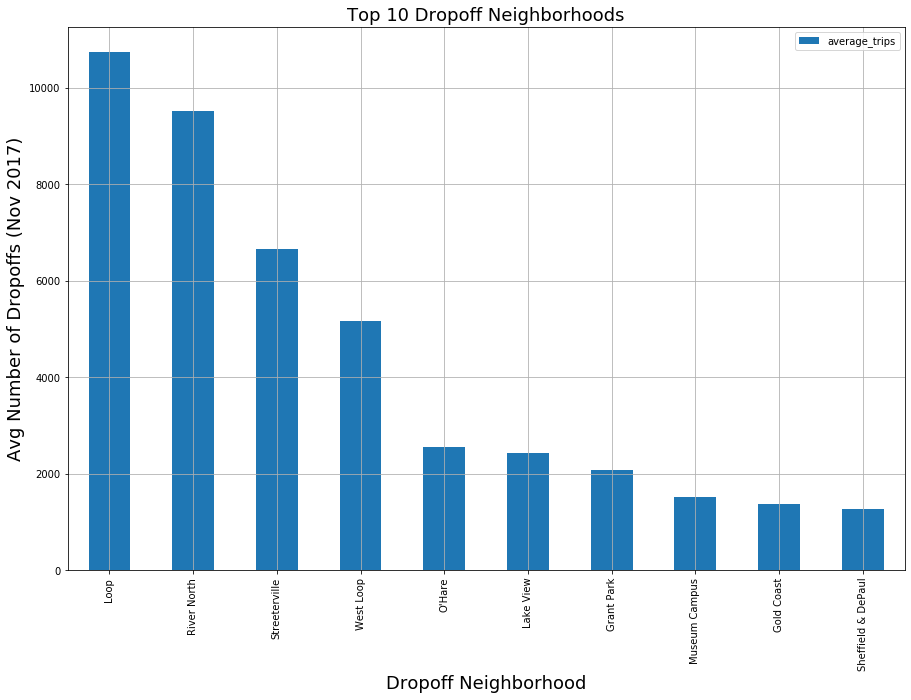

In [7]:
ax = top_ten_location.plot(kind='bar', x='dropoff_location_name', y='average_trips',figsize=(15,10),grid=True)

ax.set_title("Top 10 Dropoff Neighborhoods", fontsize=18)
ax.set_ylabel("Avg Number of Dropoffs (Nov 2017)", fontsize=18);
ax.set_xlabel("Dropoff Neighborhood", fontsize=18);




Top dropoff location is 'Loop' and number of dropoff less happened in location 'Sheffield & DePaul'

To idenfity the top 10 dropoff neighborhoods, I sorted the dropoff_location_avg_trips table by the average_trips column, rounded the average number to the 2nd decimal point and selected only the top 10 neighborhoods.

# Taxi Companies and number of rides (Nov 15-16, 2017)

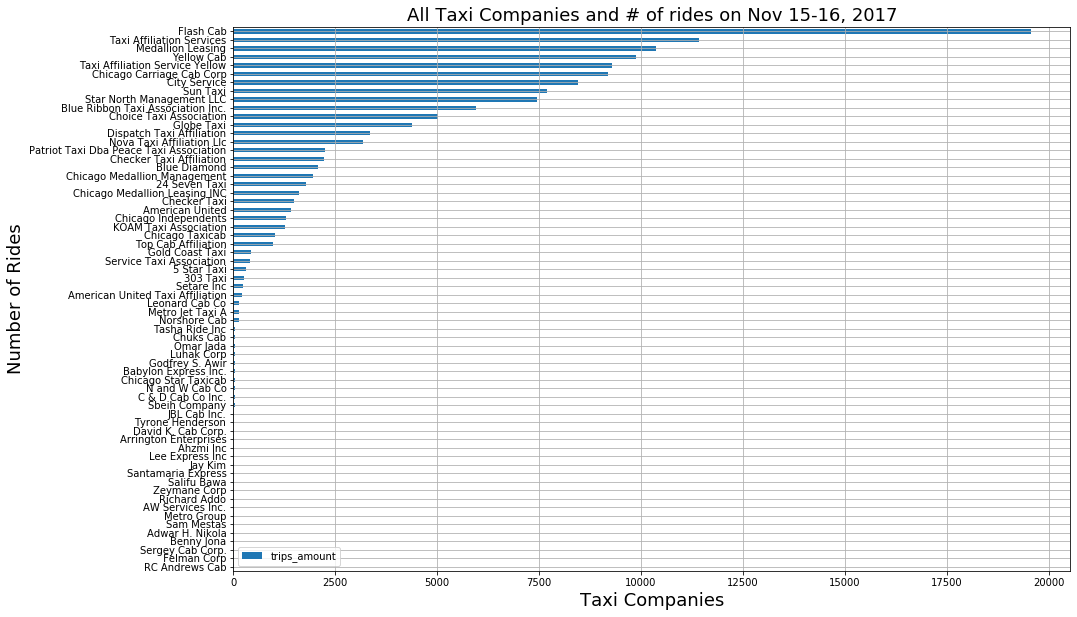

In [8]:
trip_data = company_name.sort_values(by='trips_amount',ascending = True)
ax = trip_data.plot(kind='barh', x='company_name', y='trips_amount',figsize=(15,10),grid=True,legend=True)

ax.set_title("All Taxi Companies and # of rides on Nov 15-16, 2017", fontsize=18)
ax.set_ylabel("Number of Rides", fontsize=18);
ax.set_xlabel("Taxi Companies", fontsize=18);

In [9]:
top_trips = trip_data[trip_data['trips_amount'] > 1000]
top_trips

,company_name,trips_amount
24,Chicago Taxicab,1014
23,KOAM Taxi Association,1259
22,Chicago Independents,1296
21,American United,1404
20,Checker Taxi,1486
19,Chicago Medallion Leasing INC,1607
18,24 Seven Taxi,1775
17,Chicago Medallion Management,1955
16,Blue Diamond,2070
15,Checker Taxi Affiliation,2216


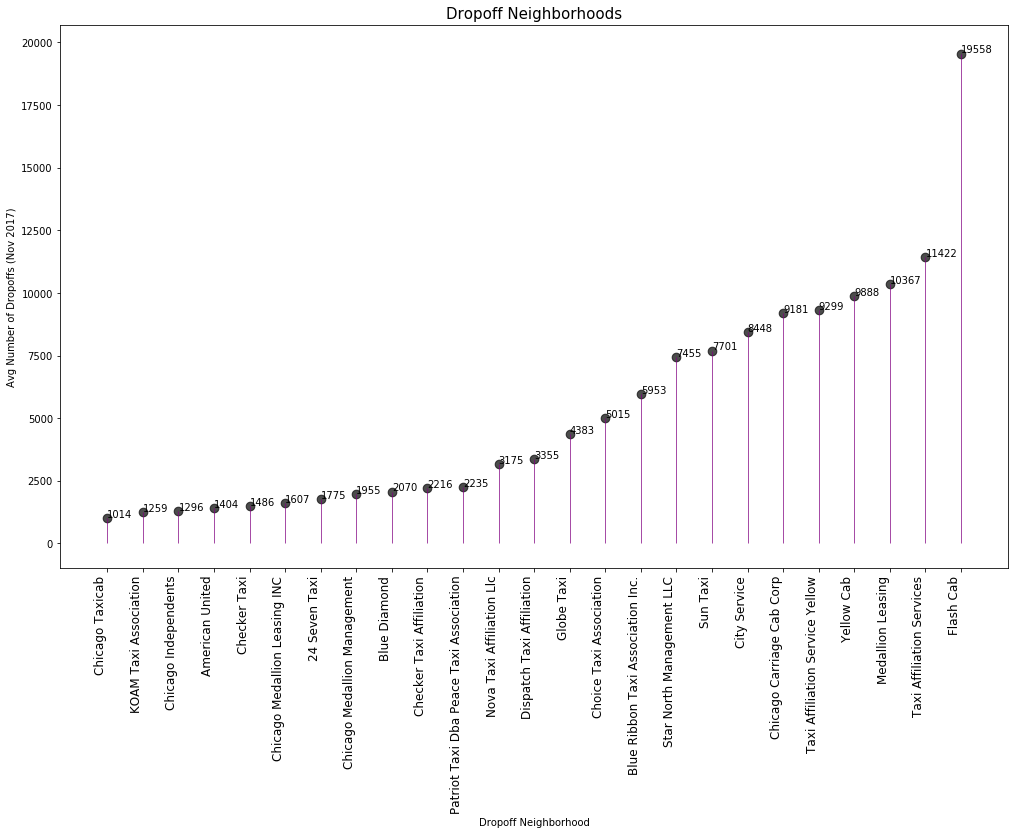

In [10]:
fig, ax = plt.subplots(figsize=(17,10))
ax.vlines(x=top_trips.company_name, ymin=0, ymax=top_trips.trips_amount,color='purple',alpha=0.7,linewidth=1)
ax.scatter(x=top_trips.company_name,y=top_trips.trips_amount, s=75, color='black',alpha=0.7)

ax.set_title("Dropoff Neighborhoods", fontdict={'size':15})
ax.set_ylabel('Avg Number of Dropoffs (Nov 2017)')
ax.set_xlabel('Dropoff Neighborhood')
ax.set_xticks(top_trips.company_name)
ax.set_xticklabels(top_trips.company_name, rotation=90, fontdict={'horizontalalignment':'right','size':12})
for row in top_trips.itertuples():
    ax.text(row.company_name, row.trips_amount+30,s=round(row.trips_amount,2))

In [11]:
top_trips_company = top_trips.sort_values(by='trips_amount',ascending=False).round(decimals=2).head(10)
top_trips_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


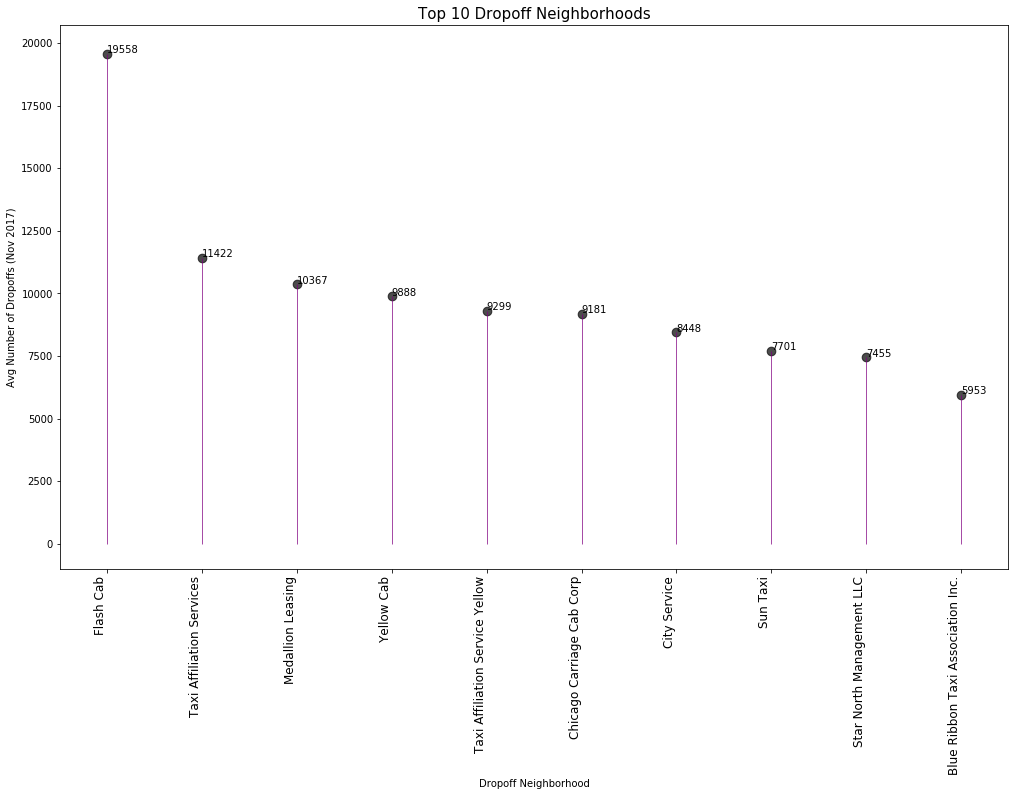

In [12]:
fig, ax = plt.subplots(figsize=(17,10))
ax.vlines(x=top_trips_company.company_name, ymin=0, ymax=top_trips_company.trips_amount,color='purple',alpha=0.7,linewidth=1)
ax.scatter(x=top_trips_company.company_name,y=top_trips_company.trips_amount, s=75, color='black',alpha=0.7)

ax.set_title("Top 10 Dropoff Neighborhoods", fontdict={'size':15})
ax.set_ylabel('Avg Number of Dropoffs (Nov 2017)')
ax.set_xlabel('Dropoff Neighborhood')
ax.set_xticks(top_trips_company.company_name)
ax.set_xticklabels(top_trips_company.company_name, rotation=90, fontdict={'horizontalalignment':'right','size':12})
for row in top_trips_company.itertuples():
    ax.text(row.company_name, row.trips_amount+30,s=round(row.trips_amount,2))

To graph the taxi companies and the number of rides they had in the period of Nov 15-16, 2017, I sorted the company_name table by trips_amounts and cut off any taxi company who had less than 1000 rides in the 1 day period.

Company with lots of rides is 'Flash cab'
Company with less rides is'Blue Ribbon Taxi Association Inc.'

# Test whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

In [13]:
loop_airport_rides = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_airport_rides = loop_airport_rides.dropna()
loop_airport_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 33.4+ KB


Null Hypothesis H0: The average duration of rides from the Loop to O'Hare Airport is the same on rainy Saturdays as it is on non-rainy Saturdays. 
Alternative Hypothesis H1: The average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Saturdays.

In [14]:
rainy_rides = loop_airport_rides[loop_airport_rides['weather_conditions'] == 'Bad']
rainy_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
start_ts              180 non-null object
weather_conditions    180 non-null object
duration_seconds      180 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.6+ KB


In [15]:
avgRainyRideDuration = rainy_rides['duration_seconds'].mean()
avgRainyRideDuration = (avgRainyRideDuration/60).round(decimals=2)
print('The average duration of rainy Saturday rides is: ' + str(avgRainyRideDuration) + " minutes")


The average duration of rainy Saturday rides is: 40.45 minutes


In [16]:
nonrainy_rides = loop_airport_rides[loop_airport_rides['weather_conditions'] == 'Good']

In [17]:
avgNonRainyRideDuration = nonrainy_rides['duration_seconds'].mean()
avgNonRainyRideDuration = (avgNonRainyRideDuration/60).round(decimals=2)
print('The average duration of non-rainy Saturday rides is: ' + str(avgNonRainyRideDuration) + " minutes")

The average duration of non-rainy Saturday rides is: 33.33 minutes


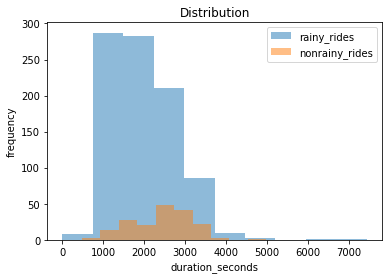

In [23]:
plt.hist(nonrainy_rides['duration_seconds'], alpha = 0.5, label='rainy_rides')
plt.hist(rainy_rides['duration_seconds'], alpha = 0.5, label='nonrainy_rides')
plt.title('Distribution')
plt.xlabel('duration_seconds')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()

We want to test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. The imported data file provides us with trip logs (start datetime, weather condition, duration of ride in seconds) for Saturdays in November of 2017. We can test the hypothesis using an independent samples t-test to compare the average duration of the ride (in seconds) from the two groups (good weather conditions and bad weather conditions). We can apply a t-test here due to the Central Limit Theorem, which implies that you can estimate the mean of a statistical population usin the mean of a sample. Since the means are approximately normally distributed - we can use the t-test.

In [19]:
results = st.ttest_ind(rainy_rides['duration_seconds'], nonrainy_rides['duration_seconds'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print('Reject H0')
else:
    print('Cannot reject H0')

Reject H0


# General Conclusions and Recommendations

We want to test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. The imported data file provides us with trip logs (start datetime, weather condition, duration of ride in seconds) for Saturdays in November of 2017. We can test the hypothesis using an independent samples t-test to compare the average duration of the ride (in seconds) from the two groups (good weather conditions and bad weather conditions). We can apply a t-test here due to the Central Limit Theorem, which implies that you can estimate the mean of a statistical population usin the mean of a sample. Since the means are approximately normally distributed - we can use the t-test.

Null Hypothesis H0: The average duration of rides from the Loop to O'Hare Airport is the same on rainy Saturdays as it is on non-rainy Saturdays. 
Alternative Hypothesis H1: The average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Saturdays.

The p_value suggests that we should reject the null hypothesis, thus indicating that the average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Satudays. This means that the sample results have a rare outcome and therefore it is very unlikely that it's just a lucky significance. This can be further proven by looking at the numbers: the average duration of rainy Saturday rides is 40.45 minutes, while the average duration of non-rainy Saturday rides is 33.33 minutes. This 7 minute difference between rainy and non-rainy days can be enough to miss a flight!

Alpha is refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%. Generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.